## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [127]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [128]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [129]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [130]:
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(to_replace = 0, value = np.NaN)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

<AxesSubplot:ylabel='Frequency'>

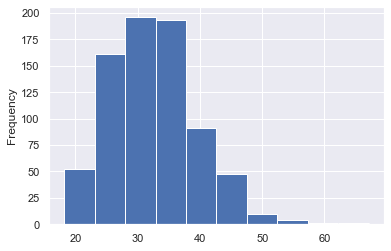

In [131]:
#diabetes_data['Pregnancies'].plot.hist(bins=10)
#diabetes_data['Age'].plot(kind='hist', bins=10)
#diabetes_data['Outcome'].plot(kind='hist', bins=10)
#diabetes_data['Glucose'].plot(kind='hist', bins=10)
#diabetes_data['BloodPressure'].plot(kind='hist', bins=10)
#diabetes_data['SkinThickness'].plot(kind='hist', bins=10)
#diabetes_data['Insulin'].plot(kind='hist', bins=10)
diabetes_data['BMI'].plot(kind='hist', bins=10)
#diabetes_data['DiabetesPedigreeFunction'].plot(kind='hist', bins=10) #I'm not sure how to individually
#plot histograms for all of the columns without using another line.

#### Replace the zeros with mean and median values.

In [132]:
#This doesn't work so I'll just change it to a replace function after switching the nans back to zero (so it can compute mean)
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].median(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True) #
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True) #
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True) #
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

<AxesSubplot:ylabel='Frequency'>

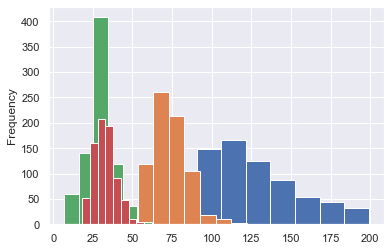

In [133]:
#diabetes_data.plot.hist(bins=10) #If there's a way to plot them all individually while only using one line
#I don't know what that is.
diabetes_data['Glucose'].plot.hist(bins=10)
diabetes_data['BloodPressure'].plot.hist(bins=10)
diabetes_data['SkinThickness'].plot.hist(bins=10)
#diabetes_data['Insulin'].plot.hist(bins=10) #Adding this makes the rest far more difficult to read
diabetes_data['BMI'].plot.hist(bins=10)

#### Plot the correlation matrix heatmap

Correlation between various features


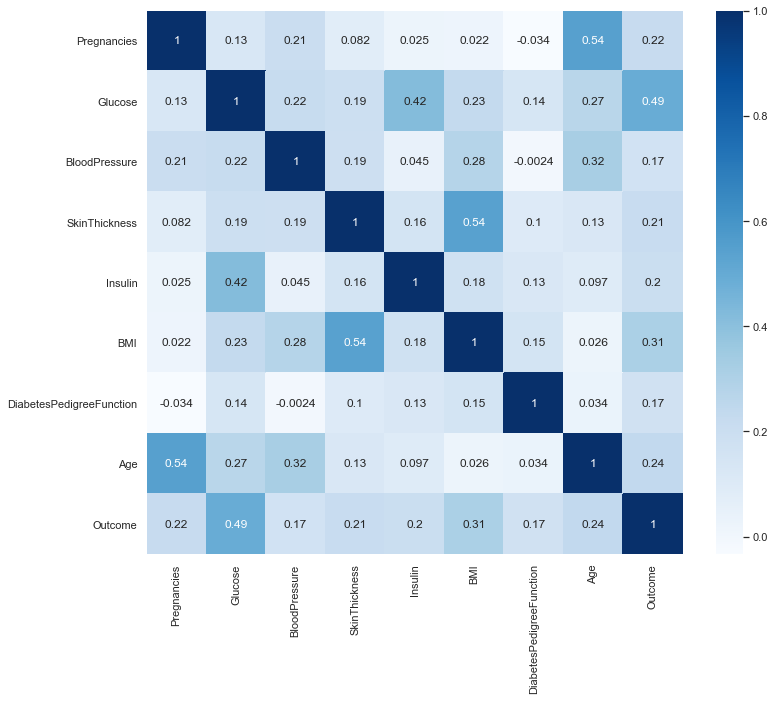

In [134]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [135]:
y = diabetes_data['Outcome']
X = diabetes_data.drop(['Outcome'],axis =1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [137]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [138]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [139]:
print("test_scores", test_scores)
print("train_score", train_scores)

test_scores [0.6753246753246753, 0.7012987012987013, 0.6796536796536796, 0.7056277056277056, 0.6753246753246753, 0.7012987012987013, 0.70995670995671, 0.6926406926406926, 0.70995670995671]
train_score [1.0, 0.8435754189944135, 0.839851024208566, 0.8156424581005587, 0.819366852886406, 0.8156424581005587, 0.8044692737430168, 0.8044692737430168, 0.7932960893854749]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [140]:
#In the training dataset, it looks like 1 nearest neighbor resulted in a score of 1.0.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [141]:
#In the testing dataset, it looks like 7 and 9 nearest neighbors resulted in a score of .70995, which is the highest.
#(I suspect a perfect score on the training set indicates overfitting)

Plot the train and test model performance by number of neighbors.

/Users/elizabethrogers/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elizabethrogers/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


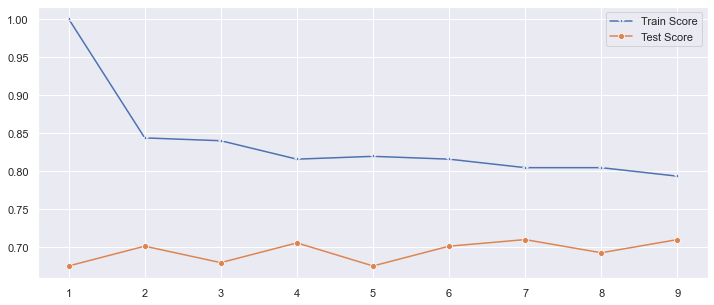

In [142]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [143]:
knn2 = KNeighborsClassifier(7) #Am I allowed to do this with actual data sets - use the test data to choose the best 
#hyperparameters?
knn2.fit(X_train,y_train)
    
print('train_score', knn2.score(X_train,y_train))
print('test_score', knn2.score(X_test,y_test))

train_score 0.8044692737430168
test_score 0.70995670995671


In [144]:
from sklearn.metrics import confusion_matrix
y_pred = knn2.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

Confusion matrix, without normalization
[[116  35]
 [ 32  48]]
Normalized confusion matrix
[[0.76821192 0.23178808]
 [0.4        0.6       ]]


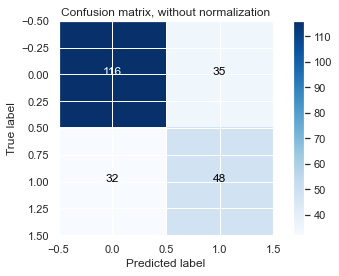

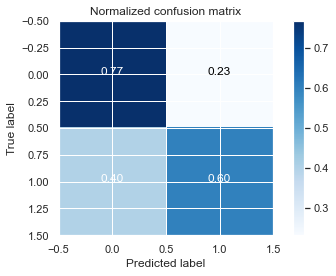

In [145]:
import itertools
from sklearn.metrics import confusion_matrix
class_names='Outcome' #It seems like this is irrevelant/counterproductive when plotting a confusion matrix that isn't
#plotting alignment to categories
def plot_confusion_matrix(pl, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        pl = pl.astype('float') / pl.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(pl) 
    
    
    
    plt.imshow(pl, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
   # tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
   # plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = pl.max() / 2.
    for i, j in itertools.product(range(pl.shape[0]), range(pl.shape[1])):
        plt.text(j, i, format(pl[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if pl[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Something that was in the example
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(pl, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(pl, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [146]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       151
           1       0.58      0.60      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [147]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [148]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_)) #As a note - the first time I did this exercise,
#I accidentally calculated the means and medians with all of the zero values still inside the dataset and I also
#got the correct answer here: 14. When I realized my mistake and fixed it so that I was calculating those means and 
#medians with NaN values replacing the zeros, I stopped getting the right answer here, and instead got something like
#31, I believe. So now I've gone back and changed all of my means to medians, figuring that might affect things, and ended
#up back at 14 again. So, I'm not sure if medians were the best choice, but that ended up being the only way
#I found to reproduce this answer. Weirdly, I got overall better training and testing results by calculating 
#means and medians with the zeros still in the dataset - maybe they indicated something important? 
#Or I messed up elsewhere?

Best Score:0.752703505644682
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [149]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':np.arange(1,50)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc,param_grid,cv=5)
rfc_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [150]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.7734912146676852
Best Parameters: {'n_estimators': 28}
